In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
# import Particle Swarm Optimization algorithm
from PSO_algo import Particle
from PSO_algo import PSO

### Description
The number of strains reported in Mozambique is $45$; and the ratio of single to co-colonization is $\mu = 16.8$. We need to estimate the matrix $45 \times 45$ $\left(\alpha_{ij}\right)$ of Mozambique. \
Since $\mu$ of Mozambique is large, we estimate parameters such that the data observation (Mozambique prevalence) is the solution of the replicator dynamics at time $\tau =50$ with the same frequencies for all initial values $z_N(0)$, $1 \leq N \leq 45$, as what we did for Brazil and Denmark. The estimation process is as follows: \
i) From $\alpha_{ij}$'s estimated in Brazil and Denmark, in Mozambique's $\alpha_{ij}$ matrix, we insert $810$ values of $\alpha_{ij}$'s already estimated in two previous processes.\
ii) Use PSO algorithm to estimate $1215$ remaining $\alpha_{ij}$'s such that the error between data observation $z^*_{\text{Mozambique}}$ and the solution of replicator dynamics with the $\Lambda$ for Mozambique, at time $\tau =50$, $\mathbf{z}(50)$ attains its minimum. \
In PSO algorithm, we choose the range $\left[-10, 10\right]$ for these $1215$ $\alpha_{ij}$'s.

In [3]:
# data observation from 5 countries
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

# import name of serotypes and their frequencies from Mozambique
strain_number = len(Mozambique.strain) #=45
Mozambique_strain = np.array(Mozambique.strain)
Mozambique_cases = np.array(Mozambique.cases)

#ratio of single to co-colonization prevalence:mu value of Mozambique
mu = 16.8

#import Brazil alpha & data
Brazil_alpha = np.loadtxt(open("Brazil_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Brazil_strain = np.array(Brazil.strain)

#import Denmark alpha & data
Denmark_alpha = np.loadtxt(open("Denmark_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Denmark_strain = np.array(Denmark.strain)

In [4]:
# initiate matrix Mozambique_alpha
Mozambique_alpha = np.ones((strain_number, strain_number))*50

#In Mozambique alpha matrix, find the positions of alpha_ij already estimated before in Brazil and Denmark and fills with these values
for xM, strain_xM in enumerate(Mozambique_strain):
    for yM, strain_yM in enumerate(Mozambique_strain):
        #insert from Brazil
        find_xBrazil = np.where(Brazil_strain == strain_xM)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain == strain_yM)
        index_yBrazil = find_yBrazil[0]

        #insert from Denmark
        find_xDenmark = np.where(Denmark_strain == strain_xM)
        index_xDenmark = find_xDenmark[0]

        find_yDenmark = np.where(Denmark_strain == strain_yM)
        index_yDenmark = find_yDenmark[0]


        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Mozambique_alpha[xM, yM] = Brazil_alpha[index_xBrazil, index_yBrazil]
        elif index_xDenmark.size > 0 and index_yDenmark.size > 0:
            Mozambique_alpha[xM, yM] = Denmark_alpha[index_xDenmark, index_yDenmark]

#np.savetxt('fix_alpha_Mozambique.txt', Mozambique_alpha, delimiter = ',')

In [5]:
#find the length of vector that we need to fit the matrix Mozambique alpha
length = 0

for i in range(0, strain_number):
    for j in range(0, strain_number):
        if Mozambique_alpha[i,j] > 49:
            length += 1

print(length)
#so we need to fit the matrix Mozambique

1215


In [ ]:
#find the coordinate of missing alpha_ij in Mozambique alpha_matrix
position = []

for i in range (0, strain_number):
    for j in range (0, strain_number):
        if Mozambique_alpha[i,j] > 49:
            position.append(np.array([i,j]))

In [6]:
#initial value
u0 = (1/strain_number)*np.ones(strain_number)

#objective function for PSO
def func(vector):
    # insert alpha vector to Mozambique_alpha
    alpha_matrix = np.loadtxt(open("fix_alpha_Mozambique.txt","rb"), delimiter = ",", skiprows = 0)
    for i in range (0, length):
        coordinate = position[i]
        alpha_matrix[coordinate[0], coordinate[1]] = vector[i]

    #compute Lambda invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    # compute the predicted frequencies, i.e. the solution of replicator equations at t = 50
    solution = Replicator(strain_number, lambd, 50, u0)
    # compute the error between observation data and predictied prevalence
    err = np.linalg.norm(solution - Mozambique_cases)

    return err

In [ ]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

#run the algorithm
PSO(func, initial, bounds, num_particles = 1200, maxiter = 1500)

FINAL:
[0.09532717962563657, 0.7243945155592123, -0.8679653898859742, -0.6947095387182566, -0.4125634126886709, 0.7937866408682093, -0.714957628362912, 0.5778412660003448, 0.7691617797286724, -0.042371441948303244, 0.8968284248203068, -0.477530762511528, 0.7759808207695996, -4.891330287623642, 0.6033316426309394, -0.11221710865889492, 0.1807423686175417, 0.368076810496377, 0.19440054488196587, 1.0849100311498423, 1.7032549540051731, 0.9533047707439946, 0.4222917248233245, -0.10730576041137531, -0.7833241940134349, -0.8146196719687493, 0.3085384880448199, 1.0463121813924534, 0.18725479169709006, -0.5092148753915833, -0.12986130432784448, -0.5370998138019027, 0.18869341393851044, -0.8657985105967999, 0.10311584792887674, -0.48219451920183043, 0.20770505692975874, -0.09171271231647461, 0.5262823288309206, -1.365668295402133, 0.49260229311102793, -0.512168838836878, -0.19674699622066616, -1.4137249194093209, -0.4274836164854301, 0.32142535964101127, 0.5677351560179588, -0.21287388615389458

In [7]:
#the 1215-vector predicted
opti_Mozambique = [0.09532717962563657, 0.7243945155592123, -0.8679653898859742, -0.6947095387182566, -0.4125634126886709, 0.7937866408682093, -0.714957628362912, 0.5778412660003448, 0.7691617797286724, -0.042371441948303244, 0.8968284248203068, -0.477530762511528, 0.7759808207695996, -4.891330287623642, 0.6033316426309394, -0.11221710865889492, 0.1807423686175417, 0.368076810496377, 0.19440054488196587, 1.0849100311498423, 1.7032549540051731, 0.9533047707439946, 0.4222917248233245, -0.10730576041137531, -0.7833241940134349, -0.8146196719687493, 0.3085384880448199, 1.0463121813924534, 0.18725479169709006, -0.5092148753915833, -0.12986130432784448, -0.5370998138019027, 0.18869341393851044, -0.8657985105967999, 0.10311584792887674, -0.48219451920183043, 0.20770505692975874, -0.09171271231647461, 0.5262823288309206, -1.365668295402133, 0.49260229311102793, -0.512168838836878, -0.19674699622066616, -1.4137249194093209, -0.4274836164854301, 0.32142535964101127, 0.5677351560179588, -0.21287388615389458, -0.8499765066093853, -0.3776517325138082, -1.3329508310797857, -1.700183883606654, 1.1192181455674157, 1.5515923869259565, 0.10739602404079872, -1.227270890818048, -1.184647834272516, 1.5736081935783341, -0.32397198405249655, 0.0870670708961667, -0.4401900869466225, -0.11930659764358958, 1.04353678525996, 0.5603323141847961, 0.5335133560092801, -0.9046426186714945, -0.36091497139484513, -1.1966394279485284, -0.7241839153757866, -0.4930398114117615, 0.2632560807592963, 0.7066704824134512, 0.5372549358177122, -1.1728345465089112, 0.032869132791291535, -0.2776682985463546, 0.8312722706832355, 0.5521794579189606, 0.10158770750819825, 0.5374825420758927, 1.395682565574085, 1.0670665381614528, -0.1332304687814496, 0.47007769152824974, -0.3838602588625847, -0.9109057304931729, 0.9696911026490009, 0.32945936075685855, -0.8063580270040267, 0.171733532890236, -0.29012531600614255, 0.4641187296259506, 2.0709423916050897, -0.029160000051708938, -1.9012255902867632, 0.09835837697901402, 0.5437322887204873, 2.6771222930531278, 1.018503459788327, 0.8952061810664934, 0.05462809207811322, -1.1201288928731286, -0.22983885184606084, 0.6782914203872379, -0.43143446239683925, -0.6986858409916141, 0.25601025481211004, 1.0405499400125287, -0.431352460010812, 0.6376747254415951, 0.1623180606703955, -0.2804119310045639, -0.1759722653719819, 0.2995178579977435, 2.9603583977524224, 2.0795884228999206, -0.841511521247859, -0.3987664453055613, -0.45459023116692615, 0.7459347290156361, -0.11221767047394517, -0.2561187987213156, 2.0233609429453243, 0.6102548387648207, 0.6676515457974136, -0.08262277164752943, 0.576704223030967, 1.5920553589564315, 0.23629095585587276, -0.462676723688534, -0.5511464726854458, -0.570465771722833, 0.07554106045863934, -2.3949686802841113, 0.9768690567132091, 1.2306007235568988, 0.11568585104252774, -0.7832031067892444, 0.06007536462754139, -2.0725252532635188, 0.2879851731972593, -0.6938145676681011, 0.7666068942177329, 0.3887668970043916, -1.1306703586637727, -1.1488771621168155, -0.6589526962463758, 0.8689121901890422, -1.0536538041222885, -0.24172196284330605, -1.6055328057080873, 0.6298298955189701, 0.3962355847672682, 0.7374062589004271, 0.16588121709392672, -0.03848829967974275, 0.14157147423240005, -0.1992030000323812, -1.6069446886052008, -0.14578915372756268, -0.42665975634009273, -0.13080577931840293, 0.3533936000927018, 0.49567449811775144, 0.5169241380400641, -0.5630291735706576, 0.6029128690058669, -0.547530197409104, 1.2362286733313304, 0.8032588419368888, -0.43176334609674355, -0.08700259953037791, 0.8268138482967142, 0.9496763749077357, -1.2617812910540382, -0.2913561967065298, 1.1858044673108927, 1.1512919898064977, -0.4759350024776271, 0.14116618191989405, 0.19376318769263157, 0.6872686863488018, -0.46683059729918613, -1.2808712488233347, -0.09863923783527506, 0.07337938488200849, 0.8700744597531991, -0.17014718734233478, -0.9486996141747465, -1.2211360949505194, -0.667373831975759, -1.3201363923609661, 0.3518255364114785, 0.4567276432419008, 0.41172439804533456, -0.2351617932382683, 0.5593745298978396, -0.34249871124975595, 0.7964314650320179, 1.4668117753617227, -0.14390419580170646, -0.5714315814138309, 0.4624924342889841, -1.333884577515008, -0.6871216029116781, 0.3166466449402638, 1.3113917605883296, 2.964245524535708, 0.5593962227388309, 0.414029039586445, 0.10711860674978863, -0.13985691668941477, 0.6325606303796335, 0.7103318752623481, 0.2722244713812203, -1.0973885523239433, 0.3912289051467664, -0.17085894803349203, -0.2050061026436898, -1.6548147054624374, -2.880126100856194, -0.7430524336989822, 1.5405820311240783, -0.8346936971137577, 0.45728757842938184, 0.9137886139187172, -0.11024628555480874, 0.8597058353583131, 0.27568736422776363, -0.3499717412238102, -0.4791455518446143, -0.5183210525037723, -0.7766251794697212, -0.7287013551484166, -0.2067034680166245, -0.0134828504089475, -0.061201332942514716, 0.08601259619708107, -0.2314454358258726, -0.8786172933816446, -1.2946473074596412, -0.30581952537430795, -0.539496762069374, 0.27916437610302003, 0.6016701742380496, 1.050294009804235, -0.3536270273340296, -0.29149423887886755, -0.604503747270336, 1.427640366531803, 2.01757119902676, 1.5160935481077191, -1.9826712784932752, -0.4638330969545141, -0.2934093405802886, -0.305867183119277, 1.4806694361703479, -0.2691060620396558, 1.0159904630428518, -1.7835516855787625, 0.676658922479286, -0.3370967623900887, -0.06333704408262882, -0.6546461752645316, 0.2158158693196202, 0.16670572136837147, -0.32106279090240963, -0.4271458136839529, -0.653961932326171, 0.23763703987755655, 0.5135588335696828, -0.8004460604390846, 1.0867109817972918, 0.822376297162061, -1.0761660798684503, 0.13740428516306893, 0.25081214381212863, 0.7354505681503979, -0.54900801154414, 1.3530819842945443, 0.06870574224122791, -1.4571305687590081, -1.4299110325304487, 0.8787184098812023, -0.14880238384444644, -0.8221089546206838, -1.8034214981828378, 1.496602918716299, -0.9005067648722663, -0.8258707674008567, -0.46815119725016063, 0.4127391985233132, 0.7469732083854942, 0.9102670041180879, -1.0004404158432347, -0.21507974021458945, -0.045466641603810184, 1.2058770249241801, -0.6031500863395672, 0.510843169077784, -0.519953368527907, 0.12919578708509188, 0.858706740502236, -0.5698583575674362, -0.7607095701222026, 1.5009785072500879, 0.5725208133677266, 0.21601317626150937, 1.7687189882637615, -0.736519300716626, -0.9823314186951357, 1.1400201758120663, -1.2392020360784524, -0.5236390100504423, -0.12386077963837912, -0.45857176821424034, -1.2110271876445307, 0.7524170739769319, 0.31827839496986726, -0.7609577522355433, 0.16712591228384807, 0.4402298656630812, 0.7689852066636519, -0.6214142697850147, -0.2249838850723762, 0.16496377617598892, 0.531370063642831, 0.41508240833022475, 0.22058205201701156, 0.45567546529004493, -0.3936082383076707, -0.7069656938975573, 0.40099187959660676, 0.27725235430505346, -1.040930652253193, -0.02490894640792607, 0.677058897033262, -1.4319461093713484, -0.685968765079805, 0.49725630909253093, -0.6856804255522008, -0.7377964911877813, 1.2165691215641075, -0.49444994027912775, -0.21825475210780035, -0.2883207395088174, -0.5395432929038011, -1.1692086399291852, 0.9582241094825046, 0.591085183500956, -0.3348522583550065, -1.735623532176061, -0.8622458467228256, -0.07371727098102067, 0.545707968633497, -0.21272639636068955, -2.1756191906864566, -2.1946103884000197, -0.24895284437111634, -0.10054946341746926, -0.5032438710604409, 1.1049700508054396, -0.4749578530142718, 0.6601640672372044, -0.17396153691170993, -0.6892077092860938, 0.19077404440306914, 0.8217214796384732, 0.3681001624350959, -0.07685762764276058, -0.21460976168506304, 0.4191287228650221, 0.016472762793026525, -0.636041859414323, 2.225890289593939, -0.8855866492911957, -1.4940514642009586, -1.9927766359430368, -0.017727559851799184, 0.08014984910641912, 0.36300089837822563, -0.377992914899011, -0.06971337752554348, -0.5277031800529278, -1.7304450401226525, 0.03388931342878305, 1.722291916669318, -0.9858041738057383, 0.24375226077510923, 0.4257417867378038, 0.8177766655764189, 0.20737062162201686, 1.5578004589502732, -0.306575606426911, 1.2624241757682615, -1.2925853376006164, -1.3660612364416607, -0.1925035524990575, 1.0779114250953976, 1.1971593375404797, -1.4958396244359349, 1.5752119006798997, 0.6097421753396036, -0.8499763123019675, -0.8127199363035513, -2.2517268914568027, -1.4434928640399292, 2.393288425360955, -0.19431356239758354, -1.1534624995578175, -0.05614953039689362, -1.2180092194178544, -1.3401621749510166, 0.059012570179098126, -0.6603821201068117, -0.009093757586253462, 0.8240642004728213, 0.1934095226326971, 0.683328725058602, -1.3057466316846649, -0.15084532478616366, 0.6773394033577154, -1.442490484812059, -0.7818897663095951, 1.9174580879370904, 1.549741590159413, 0.96999898002602, 0.24192228391905451, -0.17963181989004012, 0.6010697101058716, -1.0347887520668557, -0.4754806961816135, -0.5724490652127819, 0.27429276244941037, -0.142369575810936, -1.1827837417255698, 0.0773279949693192, 0.44738298107464536, -0.30799597566547254, 0.3507753541638218, 0.9238638888751735, 1.0886961380274773, -0.272913566779093, -0.5182247190552967, -0.9796183203405621, -0.7712491573894603, -0.028550059173624964, 0.4347540737399053, 0.2892198651029817, -0.1557753992232947, 1.0587871700921658, 0.0903377729160221, 0.18601446213400968, -1.6500140745848741, -0.04170842584047833, 0.14105275459965808, -1.2711270843808453, -1.0081010722039636, -1.8539011037637545, 0.613077848606818, -0.5347717026926574, -0.48321000195921765, 0.9037843129762593, 0.644341209257549, 0.12940341860695356, -0.054199153845523484, -0.28738614769091775, -0.12862604613349668, -1.0908556442589494, -0.3720820733439241, -1.6188986812758852, 0.9239688037444511, -0.35840421829885716, -0.7969920774160482, -0.5315002466848746, -1.2428884105749616, 0.1845087078899861, -1.2138734002458527, -1.4421821257898888, -0.33648413771374075, -0.8067765880198249, 0.008211886755387584, -0.8554790982006414, 0.06462160221705072, -0.7747222187063495, -0.6401915462818771, -0.3528481222360678, 0.45470841671870277, -0.8778035771813556, 0.40980109356433086, -0.9862070530272915, 1.9164750624049371, 1.0649443941901935, 1.6955960925422982, -0.8626892242760322, -0.3130038566316097, -0.2877043780207326, -0.42377719388122975, 0.4050266556888078, -0.6384781352567906, -0.8510208889821261, -0.7354591727912545, -0.704522961899478, 1.729564378252125, -3.499732908498985, 0.7876487568811963, 1.4842335270502434, 0.8104212745073642, -0.28031592096740887, -0.18594242866427216, -0.11186030227968208, 0.3658780080756105, -0.0934120200165306, -0.5134497990506979, 0.6773852302553034, 1.4464801556326736, -0.0036107136272215965, -1.6523696237046075, -0.35498582320658845, 1.3813043234978015, -1.981251069885964, 0.7245646247056609, -0.9379987391685022, -0.2191904102326635, -0.4158098862577098, 2.1171414079220465, -1.2431651387913703, 0.11897536172801314, -0.45168116981754336, 0.05061489543267528, 1.0132095752136863, -0.860826883432495, 0.1405446019495524, 0.3609368550816071, 0.6679474450349515, -0.8255711828269324, -1.002165952193121, 0.4476783816721269, -2.1115773030507565, -0.247712022519367, 0.18553740352306783, 0.005281105498928415, -0.3331676784863405, -0.529230842874912, -1.1891441370585802, -0.02270448808608043, 0.327979277936389, 0.40377267993330046, 1.3496516409189825, 0.37014662351696087, 0.8063763657019454, -0.0152534170472022, -0.39824027470121626, -0.8566971722255505, 0.08225032423686245, -0.9598725998442658, -0.4198044924710014, -0.31783068689202804, 0.02991411843469156, -0.44423559509986127, -0.05584101132350367, -0.6110641076917144, -0.7975433891029232, 0.7675810092599132, 0.5897598508816868, 0.03019016646798422, 0.5037642566059172, 2.0391942587051517, 0.16458330021136774, 0.011806594577349597, 1.0928443798442093, -0.49943954946288505, 0.4052555520324265, -0.31132484087727436, 1.5638848312485405, 0.3082173523035649, 1.1553509707189935, -0.07295388695552683, 0.42021806730025385, -0.1184776306115077, 1.7051032949306637, 1.9513008969165657, -0.9308383530223214, 0.5161468913392536, -0.5291567168125998, 0.3218274720039262, 0.5430768750049872, -0.005395221572818904, 0.6687330276992364, -0.3362864170121996, -0.8816639742981798, -0.16570408797855332, 0.6323957214333651, 0.5384512048642246, -0.776229058290462, 0.05374227109527434, -2.234969188837468, 0.6148610441837062, -0.6312474299965172, 1.2979253200177705, -2.331000434513551, -1.0950154118278002, -0.3234865125626468, 0.7365344974333128, -0.5348412794819591, -0.40923887920508106, -1.100186471393431, 0.3517712438219061, -0.6721736154434816, -0.9792399485091742, 1.4589113209746563, -0.2928296359114759, 0.43495299420851474, -2.8208458901252054, 0.0054909646075997935, -1.0789875004963285, -1.0375339838304096, 0.8859973848297676, 0.2312557209522424, -0.2426154944373421, 0.4448268660704594, 0.5378029574114338, 0.9570178157205964, 2.2361111073489073, -0.20366611502872464, 0.18748691496492348, -0.11884075393953669, 1.450036297150969, -1.266805147133111, -0.1167965641941614, 2.0062753372064845, 0.5523097609873491, -0.6457048771531189, -0.9320599341521848, -1.1088488601906341, -1.756054972765556, 0.6115807320190642, 1.242614768613145, 1.5332323414757862, 0.988126927237375, -1.0479930896908758, -0.1728579267164642, 0.7115929394772786, -1.2515892051944133, -0.277425722814069, 1.0820257703429823, 1.323288494958088, -0.05170582463662563, -0.15803460558988777, 0.8504763840176277, 2.08393420769567, 0.7699978248001655, 1.0891546752863066, -1.1856484966015284, -1.2211746476495435, 1.1247819941094814, 0.3274287130642352, 1.1570060242340716, 0.8649565415907573, 0.5698390789083975, 0.48516427372696597, -1.387233363767805, -1.0192317633016799, -0.6881470280307039, -0.49015868681279035, -1.2180432860488388, -0.8010580350558095, -0.9101712907928867, 0.594099759086807, 0.7573584606057072, 1.484483510829255, -0.48009231684998543, 1.0350638913295545, 0.31042617636270153, 0.0871099077111802, -1.6619531501330036, 0.5337087165985172, -2.201757809894363, 1.4606979498253299, -0.9529909440672527, 0.27431702722999957, -0.10120300233215716, 0.5003670501532206, -0.6914377576124022, 0.7901357377688554, -1.449372729183322, -0.7583741893587689, -1.318603528434195, 0.9404717011794497, 0.7124318196117835, -0.4256806065867268, -0.9138895701844795, -0.11021265980719393, -0.11696035376233678, 0.23169895575144497, -0.47311453104047263, 0.49064937687969784, -0.9850200019952854, 0.2590921692938659, 1.52452015024911, -2.278120128715597, 0.011866793753193923, 0.8859301724791494, 0.1956353003865803, -0.04441132222701636, -0.8101243841367319, 0.31658821276807075, 1.5298071492328529, -0.6800075939478956, 1.2354733504820532, 0.7819639835486113, 1.0137632453092444, -0.7949537047934075, -0.3344387239492947, -0.6449497971764019, -0.06925521837187172, 0.32487799632197323, 0.21460966108089305, 3.4091747567712307, -0.44480063934969344, 0.17195525557217314, 1.0944098069310975, -0.681717698662733, -0.4914757840001211, 0.46493973007596756, -0.5916455942811759, 0.8471444111975017, -1.5877163840983823, -1.4861368777998132, 0.2389798862279563, 1.3740315048288354, -0.26415686036571917, -0.5256212740083813, -0.1041774261378132, 0.669828417798041, 0.32665179890596246, 0.7853729854753299, 0.7380004187851397, 0.4358914488248423, 0.09410279821265555, -0.3392868873739823, -0.47137426597782234, -0.9254545984718264, 0.16994392935991065, -0.740122266062553, 0.8202197899019424, 2.3546466257738117, -0.4442730070578113, 1.865536438089666, 0.03687442887659524, 0.30656178465601314, 0.8643885239605854, 0.8201707288333359, -0.1409971377418089, 1.6259906811249722, 0.810653741483306, 0.3842723829310133, 0.9806357453777428, 0.5148348265737331, 1.2687453112079055, -1.3514390480315939, 0.9538525890729969, 0.15680815611638754, 1.7124224987745265, -0.21075482376440283, 0.35476132284664974, -0.4307112289176516, -0.6405278034279721, 0.9375627757789832, -0.48624425150621176, -0.17241076755625295, 0.09269732339376437, -0.41646169426653523, -0.022254814475657768, 1.0358716971441486, 0.5425128807598896, 0.2750480182698324, 1.1049474351126765, -2.094044586231137, 0.06724261808466639, 0.8345472806324751, 0.3005030788578335, 0.6045935783949765, 0.08164290850193053, -0.21793744821278943, 0.4980307402866861, -0.0756812451801994, -0.05204191866311319, 0.24867801753412838, 0.8097351990772134, -0.4295640478002774, -1.70296672770811, -0.5747850102507834, -0.29694357707698765, -2.247501737030026, -0.5598510957934626, -1.1422878515111272, -0.28655580037295875, -0.6646954196767638, 0.13621773957721584, -3.461945169373773, 1.6334976625483895, -1.8302504529230628, -1.3535380916652449, 1.4632775016122095, -0.030074221053493173, -0.8438974062465877, -1.7601065374157951, -0.9886743991378303, 0.6181749641748594, -0.2089036070092155, -1.0452435434641925, -0.31977117588313747, -0.7015795695276272, 0.6662012442734944, 0.37106328282534246, 1.9754849752917263, 1.1996286918467685, 0.5399187546026967, 0.02974572737008981, -0.9265485257860766, -0.22117862956424786, 1.0847259389566484, 0.05655253970593826, 0.18713770955045025, 0.5520590698989998, 0.5473708926746974, -1.6656764666204853, -0.3517075684569922, 0.11366862342580217, 1.062969969431359, -0.582303580284072, -0.809821578848146, -2.0356584790654906, 0.9445182820967458, -2.126798592288378, 0.24993502833102652, -1.0626409279885276, -0.6430163371510922, 1.0321731125573284, -1.3024723976535162, 0.14124230473540264, 1.3251085837840768, -0.07135563680254202, -0.09233310037833373, 0.2869697862274429, -0.7619824025011949, 1.2309819088848162, 0.5123586931983363, 0.32941725080759887, 0.9448794911409052, -0.2518356695938944, 1.146869062364188, -1.0711945577703237, -0.4873753547989446, 0.19528597033346098, -0.3658201361879035, 0.4630369122363094, -0.06200721655895216, -0.38238541166071627, -0.39082431464566625, 0.069236789596329, 0.37379151401442545, -0.20631552892071642, 0.29305565564149216, -0.3107055730492299, -0.14279182668883897, -1.2634357268658232, -0.3276170361035145, 0.17089163064387025, 1.4710450421348378, 2.1356494090197082, 1.406028565037672, -1.2939769683312818, 0.5814946330663268, 1.994426408987678, -0.9815437487705178, 0.5439217015517024, -1.6152535397650114, -0.7820441375409155, -1.5687630952405183, 1.9948905274416389, -0.5247204495875473, -0.3241981745277086, -0.286353338392077, -0.4094358434725555, 0.1929705416064367, 1.106202094946149, -0.04567641245156367, 0.5418931277565336, 1.259800358797914, -1.1044834456496748, 0.3079282088314928, 1.0892769730174943, -1.0140219305927434, -0.4380056477562668, -0.6497548123844135, 0.21753156362419682, 0.01790218397294606, 0.39219850038984777, -0.013250390046410546, -1.3622235637903024, -0.5223871276996827, 0.09107691842442993, 0.9744899306883877, -0.7071723244282995, 1.5298489200487457, 0.12288907889270526, -0.25923051199389274, 0.00025039987441145026, -0.20063392855761092, 2.1108210143840087, 0.055579369778940235, -1.411343378166629, -0.7923675286013172, -0.5054843399324527, 0.491483895248875, 1.084230159614876, 0.6975672146136063, -0.28018547129604965, -0.29839410123595733, 0.30997385913895686, -0.6164835632514011, -0.3038861199246163, -0.5129799852592412, -1.2483369862344071, 1.1624088114584785, 0.6727713933190287, -0.21575943565173003, 0.02180439354912743, 2.7735723199283107, -0.43851105145267455, -0.4941764465301119, 0.71557377992748, -0.46875822326824784, -1.189404405671891, -0.47725132368520534, 2.1111136136160056, 0.8168908539002114, -0.8255456633012594, 2.8835796980956965, -0.35517769383585296, 0.6183688054974327, -1.0492452260310878, 0.4267751735229488, -2.782854610002035, -0.19648996748206307, 0.27837849630389355, 0.2038500444669641, 0.6438140886956711, 0.022383659743966288, 0.17104318061154167, -0.36413308464071803, -0.5875890572149094, 0.5506937836025423, -0.42942990541642073, -0.6161261113776789, -0.7715482147488649, -0.771658487602869, -0.07258579444218113, 0.7279159190957925, -0.8728766934259855, 0.39074649128303157, -0.5238044344861638, 0.6239597156813105, -0.5625126463528081, -0.7287995375628071, 0.9149331261329415, 0.9447113890669483, -1.8318813210965401, 0.2169723672003656, -0.2752370451283767, -0.29058330756442224, -1.2935428819528627, -0.6080809056760974, 0.14759893660474513, 0.30038121458427824, -0.7594008789705167, -0.7507449166168579, 0.005071474230769094, -0.9049738615827615, -1.6309180949886908, 1.2958614409178004, -3.0798077616514528, -0.15771422145053263, 1.7212228912310004, -0.43095861302487076, 0.5377921466338751, 1.9571988421050917, -0.9151895912249195, 2.304675020574503, -0.491698682322767, 0.41129872489183167, 0.12186413083970224, 1.3247872850180082, 1.712986066316264, -0.11091049391719614, 0.49069854440350447, -0.3889588986496903, 0.1807487954291803, 0.6239003754672885, -0.1983863202374849, -0.10521978661764139, 0.7985988926263677, -0.5821642705853509, 0.0646759073896362, 0.5019830294294823, 0.21734490536604925, 0.13141169295812088, 0.7708624323797657, -0.08562183506818614, 0.10001422936349867, -0.8884594228834346, 0.02322712617703723, 0.854984736635344, -0.40459711807867704, 0.15867049241896794, -0.6440525734033006, -0.9532765200143186, 1.6303276810170577, 0.6677932256455054, -0.43392614709239946, 1.3364355904988166, -0.7981927329363622, -0.4721437423030673, -0.16546651962150963, 0.5134459884870796, -0.29217257605761354, -0.7120220221853296, 0.2929836992547026, 0.829283998948303, 2.8878603021494746, 0.2833838637729104, -0.3762284535296931, 0.8563240681949388, -0.5217092426918982, 0.7346257553264093, 1.4636121739151746, 0.4999376501889886, -0.8751549503081192, 0.769561292413811, 0.9388177068682348, 0.45521440171981986, 0.061781475248422514, -0.4430424645680887, -0.28857062906389486, 1.0603544337209287, -0.1502478004806996, -1.1454622263072836, 0.07205400900997548, -0.6400233629429846, -2.2055088288744535, 0.2871409828297001, 0.12899140986855903, -0.6808173817394841, -0.6843163834583541, -0.276238940066576, 0.3046689033586694, -0.6293752840946005, 0.14943065307084782, -0.6801021266514966, 0.20756600858785232, -0.11721751618617404, -0.15278948992060154, -0.16731005422783066, 1.111639607907651, 0.517183072042581, -0.2977301526877061, 0.25600380249084853, -0.11633029146873719, -0.4542055703369368, 0.6665117653571546, -0.26249306119686494, -0.5879247838696169, 0.28780153375004147, -0.08886845391820873, -0.63685682744511, 0.34688264438844807, 0.9756402508611522, 0.8568159155290557, 0.21947018912317146, 0.15850670173102088, 1.4119000117416285, -2.2458900196901666, 0.5419123699457319, 0.4309045894360113, -0.16402339297193033, -0.23928439137251384, -0.08126504406019561, 0.8596315036880274, -0.12047483737293145, -0.6202275753156921, 0.2920276533604692, 1.0049868997698894, 0.6965442037162117, 0.9090525300571921, 0.6258936720151134, -0.13775059522422217, 0.5102172259798209, -0.8065132204266947, 0.29854386623626544, 1.4985923860407673, 0.4408965246715427, -0.016243000787890045, 0.8365360925517946, -0.11650285124381968, -0.6943232584790011, 0.638186372697826, -1.2271220839441919, 0.43568959693819814, 0.2705522182954231, 0.15328736878175434, 1.40239232484235, -0.7178724149041126, 1.6399131987765871, 0.5921792024765343, 0.26994338279061014, -1.0924076193203935, -0.4397754979174277, 0.5864376974673488, -0.614219621788717, 1.044058118896084, -1.1982550282545879, 2.7227392650881233, -1.070722624283759, 0.11197341190599668, -0.12382091019525635, 0.3536333230671842, -0.26718455086184345, 0.2695515415452479, -0.6725215562368893, -0.9301596292687562, 0.7425338949405706, -0.2372166560863563, -1.5255586917576784, -1.131966737579506, 1.7837397013285, 0.8265817267207031, 0.18709509620050588, -0.2075296971808315, 0.8564934661131032, 1.0501773980490787, 0.7256666067196053, -1.161951400027465, -0.67066046849864, 0.8280394941602403, 1.0334391746923612, -1.0084975840895432, 0.36962692754735216, -1.2233520232625787, 1.5475741784833423, -0.30451074530607575, -0.7533164686585361, -0.4867741207677447, -1.1941541329722813, -0.8481079743849979, 1.57772930277685, -0.5163136911579128, -2.7876103497531743, 0.4879908681544363, 1.0323613150366242, 0.9213160831350803, 0.17313442255271932, 2.6822198752811928, 0.13720466910480345, 0.824997993885818, -0.08631304630599078, 0.4997223932448589, 0.033452253022337126, 0.3489799590641181, 0.8009883274285093, -1.3119670853418062, 0.5867154052069286, 0.43751373756809064, -1.552321624725153, 0.08572214703674771, 0.13254665360850498, 0.6995758862940309, -0.5021862753332483, -0.45049657003755716, -1.4789405170501477, -0.277925166273025, 3.1025360294520006, 0.6285526747381366, -0.1183598271496334, 1.0426257365887686, 0.0502693191309013, 1.9248110309724042, 0.6521548337812885, -1.2150197993698972, 1.0154826690932712, 1.018936140948493, -0.4088446211488283, 0.8243521832145915, 1.8990439238316004, -0.805981514948607, 1.191143467238904, 0.45092582359590744, 0.4224463744347923, -0.39584146905394607, 1.3922129043857838, -0.5114167107630099, -0.2946514482524809, 0.5714942653633768, -0.751255710082771, -1.6182553209158042, -0.21753116263330782, -1.9724029364097118, 0.38883836826703405, -0.4484790760970167, -1.3959142171781933, 0.09425784682716858, 0.21384563898610584, -0.9910268405778344, 1.2369879439259883]
#load the Denmark alpha matrix which already has the common alpha_ij inserted from Brazil and Denmark alphas
Mozambique_alpha = np.loadtxt(open("fix_alpha_Mozambique.txt","rb"), delimiter = ",", skiprows = 0)

#insert 1215 alpha_ij predicted in this step
for i in range (0, length):
    coordinate = position[i]
    Mozambique_alpha[coordinate[0], coordinate[1]] = opti_Mozambique[i]

#save Mozambique alpha matrix
np.savetxt('Mozambique_alpha.txt', Mozambique_alpha, delimiter = ',')

In [8]:
#import the matrix alpha
Mozambique_alpha = np.loadtxt(open("Mozambique_alpha.txt","rb"), delimiter=",", skiprows = 0)

#solve the replicator dynamics and import to a database
#compute the Lambda invasion fitness matrix
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Mozambique_alpha[j][i] - Mozambique_alpha[i][j]) + Mozambique_alpha[j][i] - Mozambique_alpha[j][j]

#compute solution, i.e. predicted frequenices and print the estimate error
solution = Replicator(strain_number, lambd, 50, u0)
err = np.linalg.norm(solution - Mozambique_cases) #the error is valid
print(err)

0.043696919342972096


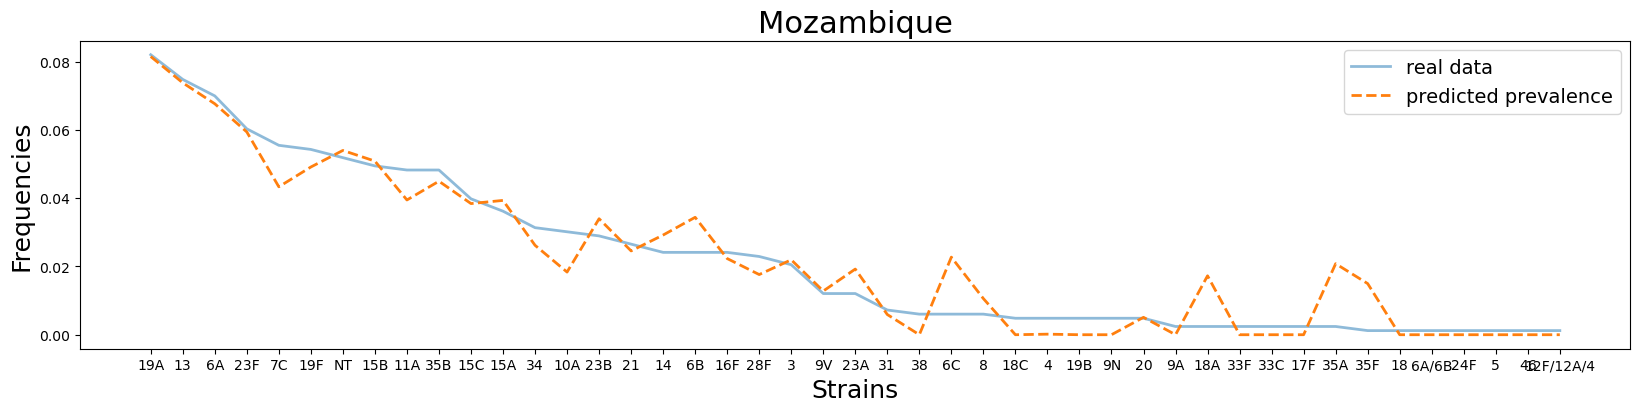

In [9]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Mozambique.strain)

fig = plt.figure(figsize = (20, 4))
plt.plot(range_strain, Mozambique_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Mozambique', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()
fig.savefig('Mozambique_estimate.png', dpi=300)